# Вариант №10 Рабочая Д.А. ИУ5-61Б
**Задание.** Для заданного набора данных (по Вашему варианту) постройте модели классификации или регрессии (в зависимости от конкретной задачи, рассматриваемой в наборе данных). Для построения моделей используйте методы 1 и 2 (по варианту для Вашей группы). Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик). Какие метрики качества Вы использовали и почему? Какие выводы Вы можете сделать о качестве построенных моделей? Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.  
**Метод 1** - Линейная/логистическая регрессия  
**Метод 2** - Метод опорных векторов  
**Датасет** - https://www.kaggle.com/datasets/willianoliveiragibin/games-and-students

# Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
from sklearn.impute import SimpleImputer

# Загрузка датасета

In [2]:
df = pd.read_csv('games_and_students.csv')

print("Первые 5 строк датасета:")
display(df.head())

Первые 5 строк датасета:


,Sex,School Code,Playing Years,Playing Often,Playing Hours,Playing Games,Parent Revenue,Father Education,Mother Education,Grade,percentage
0,0,1,1,2,1,1,4,4,5,77.50,"7750,00%"
1,1,1,1,3,1,1,1,3,3,83.00,"8300,00%"
2,0,1,0,0,0,0,1,3,3,80.00,"8000,00%"
3,0,1,3,5,1,1,2,2,3,45.00,"4500,00%"
4,1,1,1,1,2,1,1,3,4,85.00,"8500,00%"


# Удалим ненужные поля

In [3]:
df.drop(columns=['Grade', 'percentage'], inplace=True)

# Проверим пропущенные значения

In [4]:
print("\nПропущенные значения в датасете:")
print(df.isnull().sum())


Пропущенные значения в датасете:
Sex                 0
School Code         0
Playing Years       0
Playing Often       0
Playing Hours       0
Playing Games       0
Parent Revenue      0
Father Education    0
Mother Education    0
dtype: int64


# Заполним пропуски медианой

In [5]:
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Разделим данные на признаки и целевую переменную

In [6]:
X = df_imputed.drop('Sex', axis=1)
y = df_imputed['Sex']

# Разделим выборку на обучающую и тестовую

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабируем признаки

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Метод 1: Логистическая регрессия

In [9]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]  # для ROC AUC
acc_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_prob_lr)

print(f"\nЛогистическая регрессия — Accuracy: {acc_lr:.2f}, F1: {f1_lr:.2f}, ROC AUC: {roc_auc_lr:.2f}")


Логистическая регрессия — Accuracy: 0.70, F1: 0.70, ROC AUC: 0.79


# Матрица ошибок

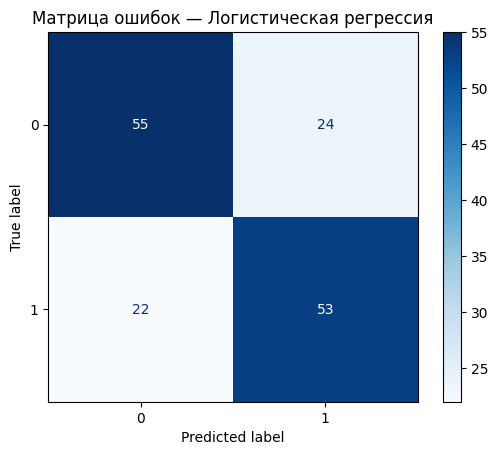

In [10]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
ConfusionMatrixDisplay(cm_lr).plot(cmap='Blues')
plt.title('Матрица ошибок — Логистическая регрессия')
plt.show()

# ROC-кривая

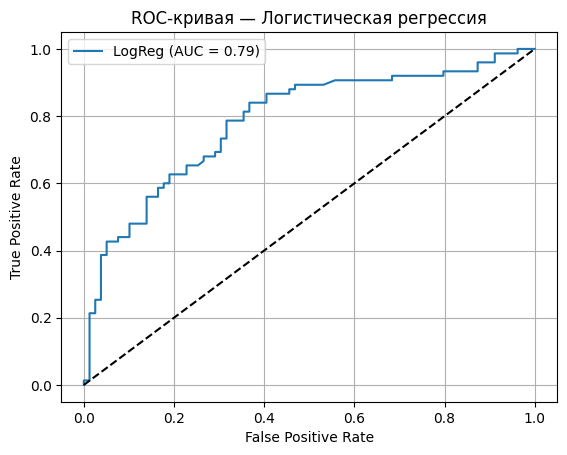

In [11]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
plt.plot(fpr_lr, tpr_lr, label=f'LogReg (AUC = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая — Логистическая регрессия')
plt.legend()
plt.grid()
plt.show()

### Метод 2: Случайный лес

In [12]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]
acc_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
print(f"\nСлучайный лес — Accuracy: {acc_rf:.2f}, F1: {f1_rf:.2f}, ROC AUC: {roc_auc_rf:.2f}")


Случайный лес — Accuracy: 0.69, F1: 0.70, ROC AUC: 0.75


# Матрица ошибок

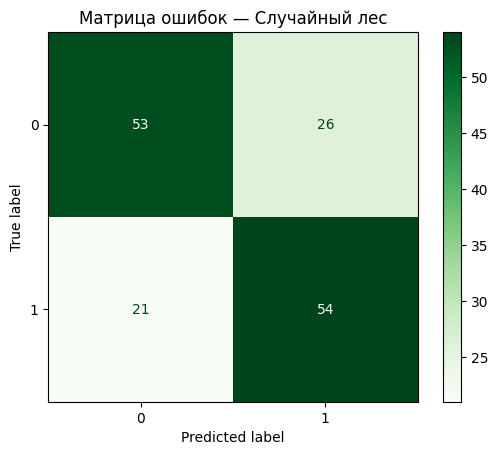

In [13]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(cm_rf).plot(cmap='Greens')
plt.title('Матрица ошибок — Случайный лес')
plt.show()

# ROC-кривая

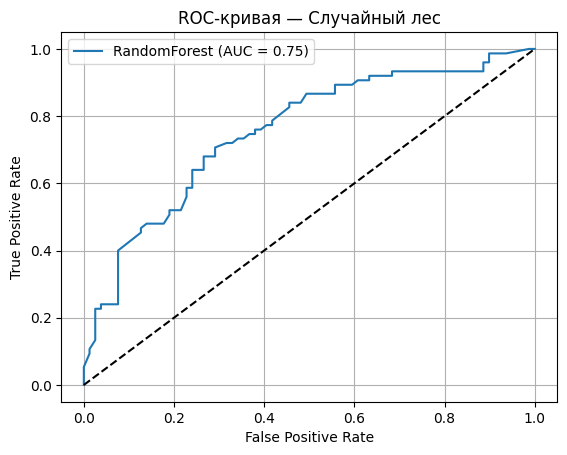

In [14]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
plt.plot(fpr_rf, tpr_rf, label=f'RandomForest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая — Случайный лес')
plt.legend()
plt.grid()
plt.show()

# Важность признаков

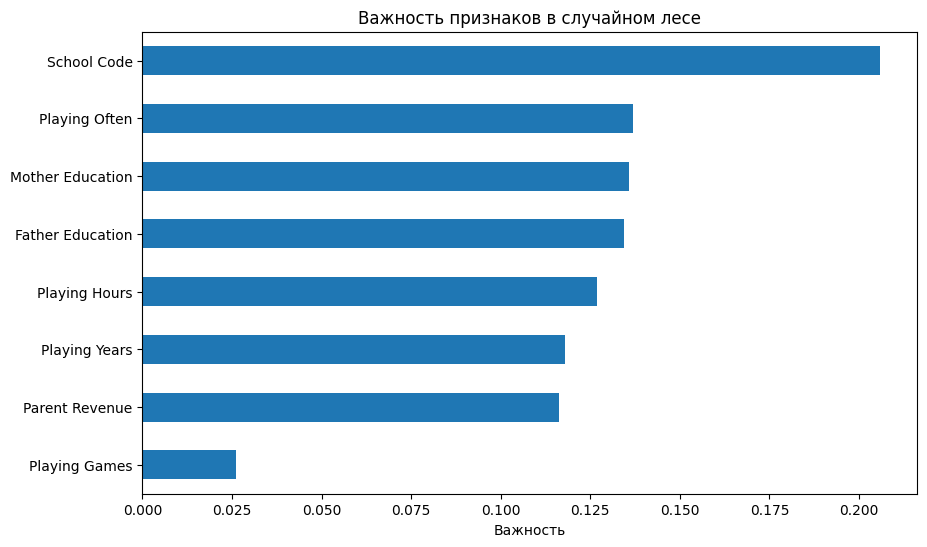

In [15]:
rf_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values()
plt.figure(figsize=(10, 6))
rf_importance.plot.barh()
plt.title('Важность признаков в случайном лесе')
plt.xlabel('Важность')
plt.show()

# Сравнение моделей

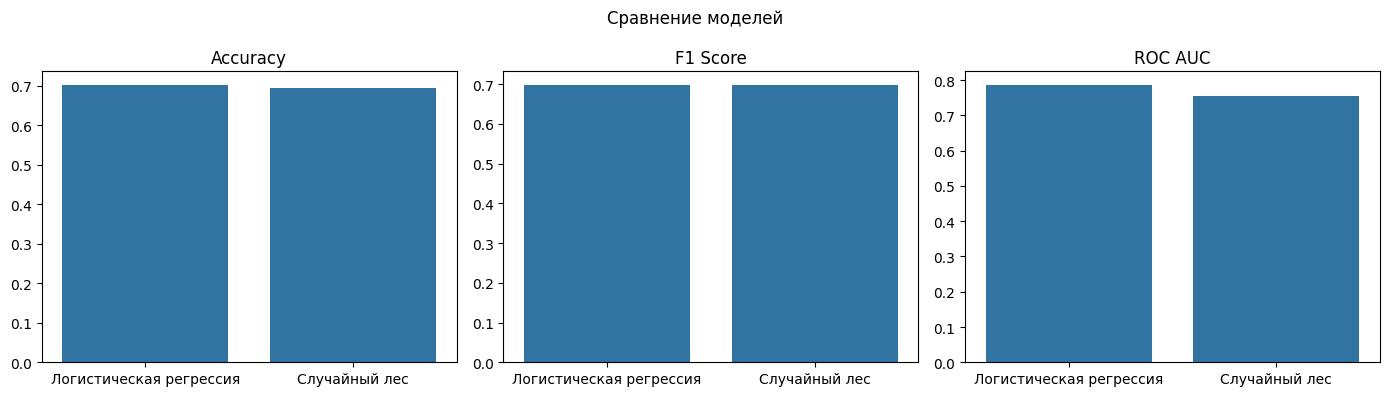

In [16]:
models = ['Логистическая регрессия', 'Случайный лес']
accs = [acc_lr, acc_rf]
f1s = [f1_lr, f1_rf]
aucs = [roc_auc_lr, roc_auc_rf]

plt.figure(figsize=(14, 4))

plt.subplot(1, 3, 1)
sns.barplot(x=models, y=accs)
plt.title('Accuracy')

plt.subplot(1, 3, 2)
sns.barplot(x=models, y=f1s)
plt.title('F1 Score')

plt.subplot(1, 3, 3)
sns.barplot(x=models, y=aucs)
plt.title('ROC AUC')

plt.suptitle('Сравнение моделей')
plt.tight_layout()
plt.show()